# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Library to help with statistical analysis
import scipy.stats as stats

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.model_selection import train_test_split

## Loading the dataset

In [2]:
#Access to Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/ReCell/used_device_data.csv')


## Data Overview

- Observations
- Sanity checks

In [4]:
# returns the first 5 rows
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [5]:
# returns last 5 rows
df.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [6]:
#shape - to get number of rows and columns
df.shape

(3454, 15)

In [7]:
# Info command to find the Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [8]:
# Describe to get the statistical data
# Transpose for better view
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


Observations:
- Dataset has 3454 rows and 15 columns
- There are 9 float, 2 integer and 4 object data types
- There are missing values
- Min price for used device is 1.5 Euros and maximum is 6.6 Euros
- Average price of used device is 4.4 Euros

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

**Univariate Analysis**

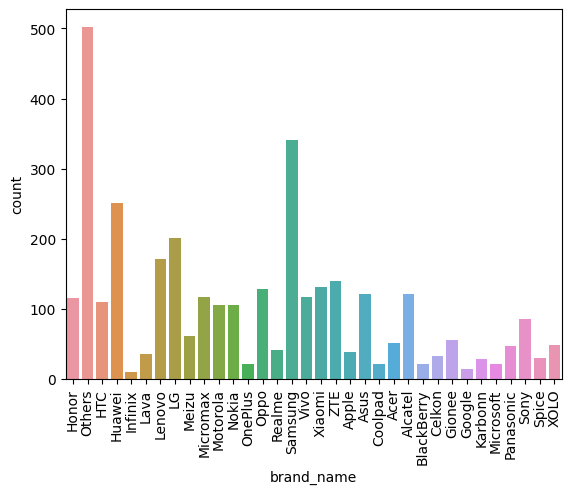

In [9]:
#Categorical data - brand_name
sns.countplot(data=df,x='brand_name');
plt.xlabel("brand_name")
plt.xticks(rotation=90);

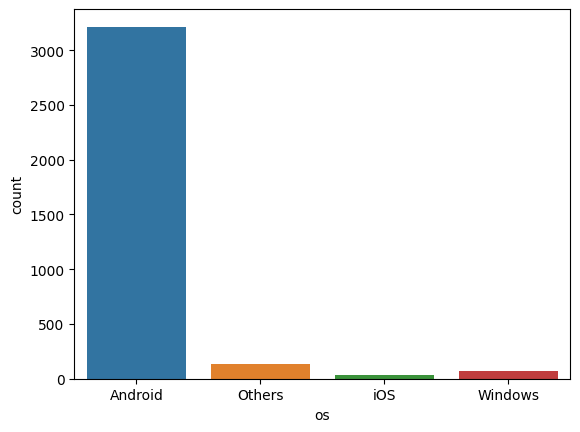

In [10]:
#Categorical data - os
sns.countplot(data=df,x='os');


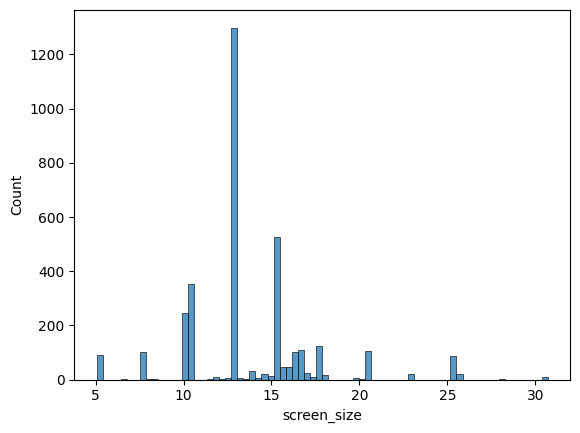

In [11]:
#Numerical data - screen_size
sns.histplot(data=df,x='screen_size');


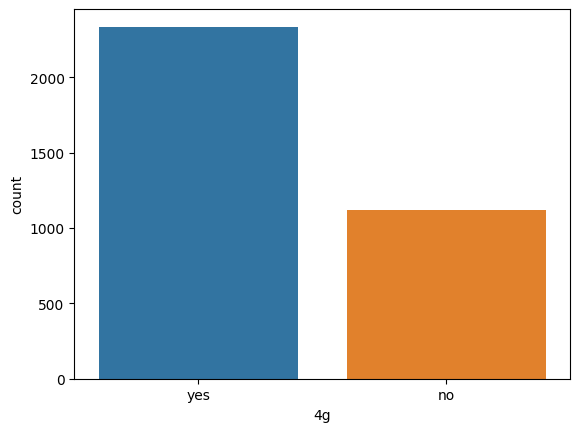

In [12]:
#Categorical data - 4g


sns.countplot(data=df,x='4g');

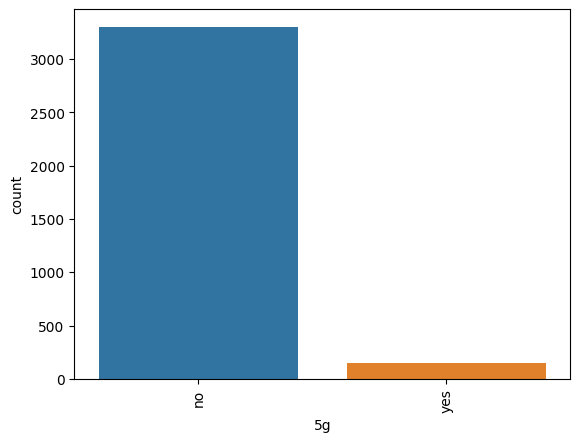

In [130]:
#Categorical data - 5g
chart = sns.countplot(data=df,x='5g');
chart.set_xticklabels(chart.get_xticklabels(),rotation=90);

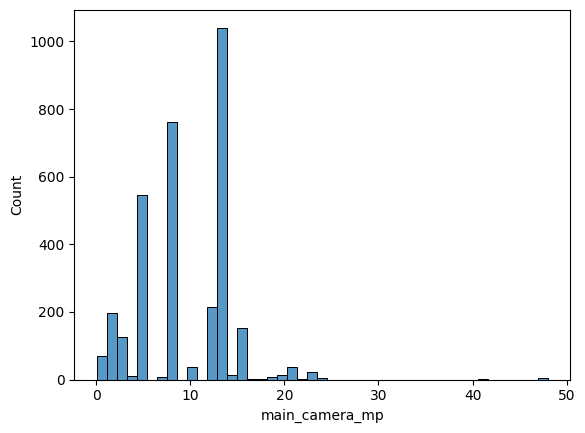

In [14]:
#Numerical data - main_camera_mp
sns.histplot(data=df,x='main_camera_mp');

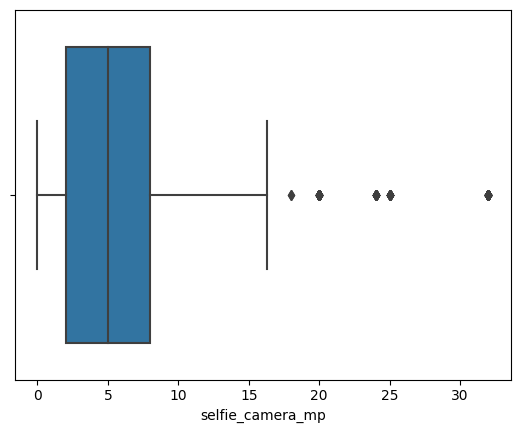

In [15]:
#Numerical data - selfie_camera_mp
sns.boxplot(data=df,x='selfie_camera_mp');

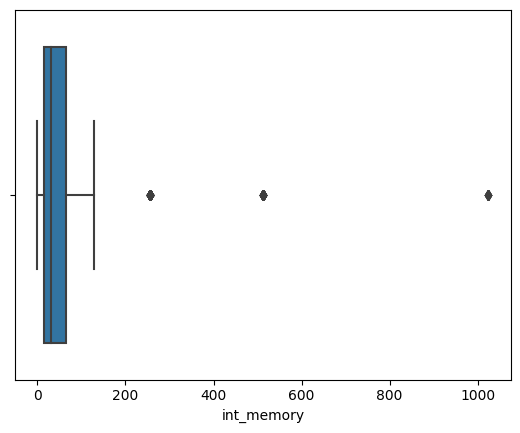

In [16]:
#Numerical data - int_memory
sns.boxplot(data=df,x='int_memory');

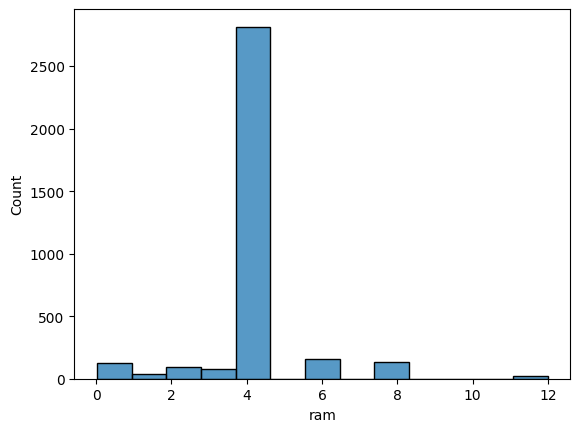

In [17]:
#Numerical data - ram
sns.histplot(data=df,x='ram');

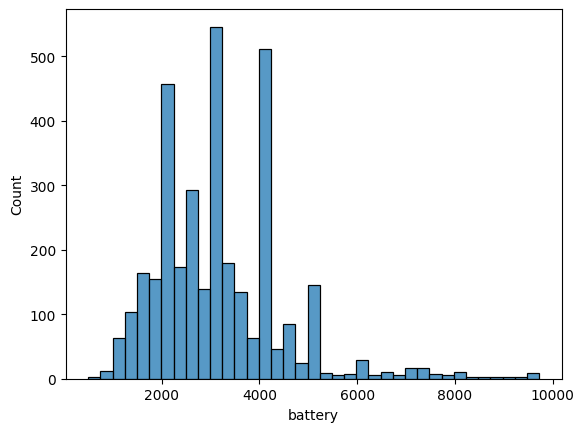

In [18]:
#Numerical data - battery
sns.histplot(data=df,x='battery');

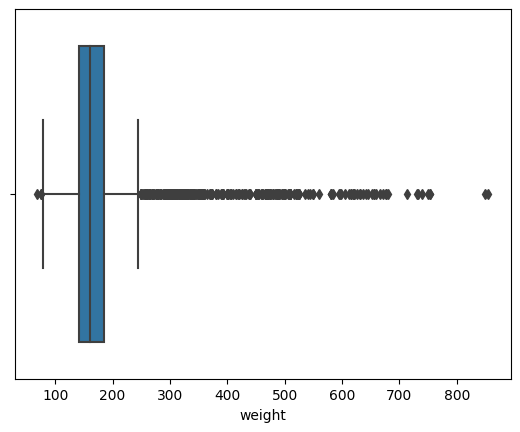

In [19]:
#Numerical data - weight
sns.boxplot(data=df,x='weight');

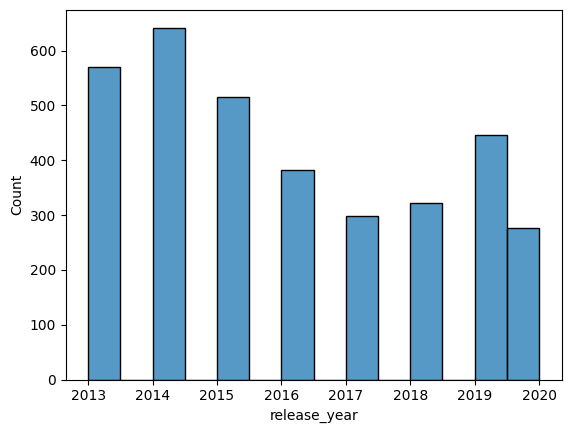

In [20]:
#Numerical data - release_year
sns.histplot(data=df,x='release_year');

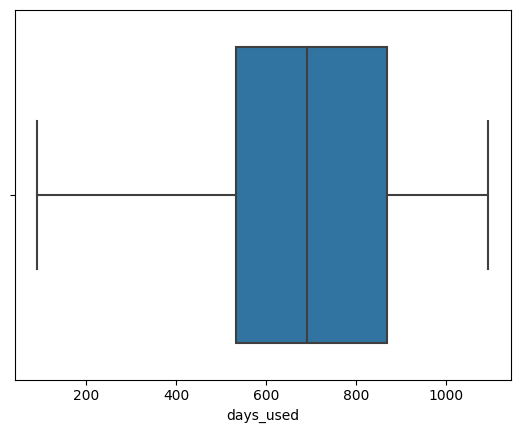

In [21]:
#Numerical data - days_used
sns.boxplot(data=df,x='days_used');

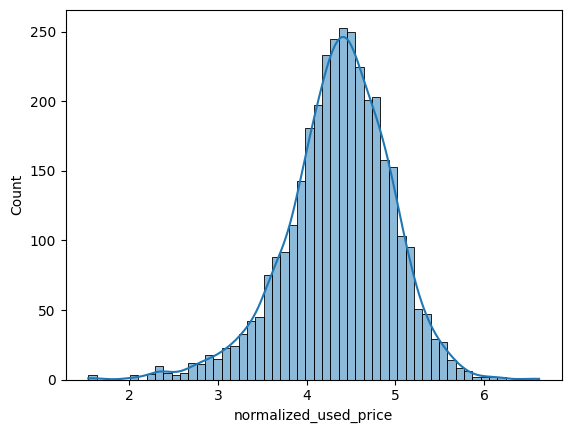

In [22]:
#Numerical data - normalized_used_price
sns.histplot(data=df,x='normalized_used_price',kde='True');

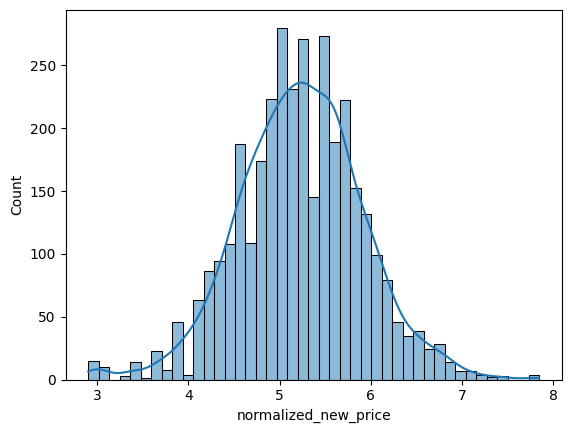

In [23]:
#Numerical data - normalized_new_price
sns.histplot(data=df,x='normalized_new_price',kde='True');

**Multivariate Analysis**

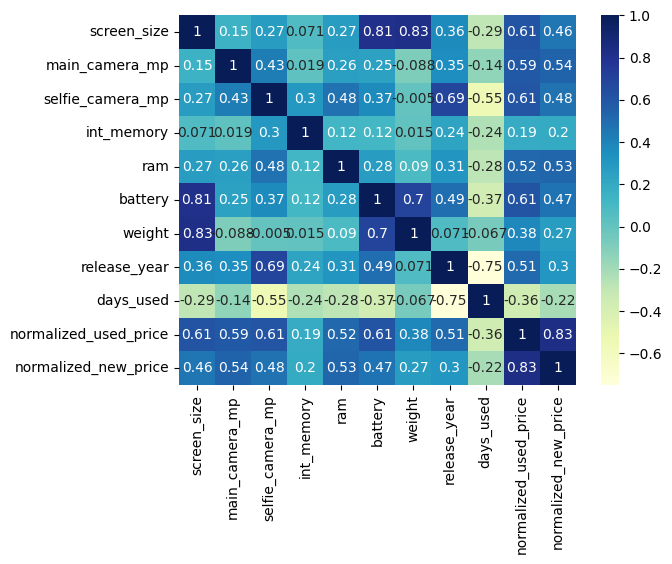

In [24]:
#print(df.corr())

# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

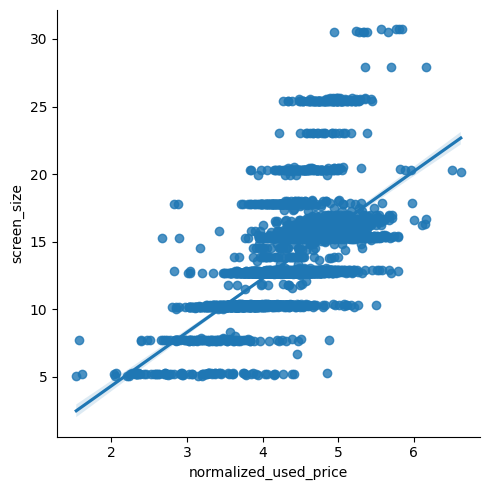

In [25]:
#normalized_used_price	vs screen_size
sns.lmplot(y='screen_size',x='normalized_used_price',data=df);

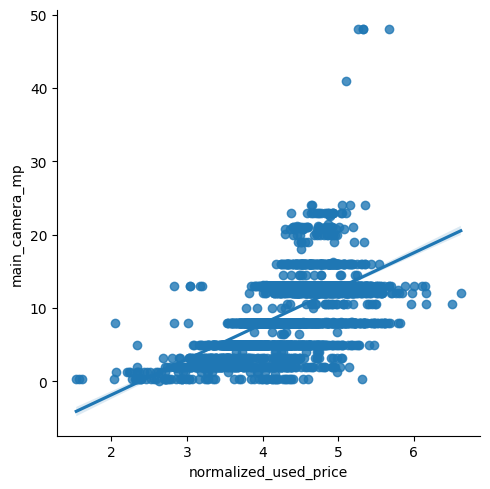

In [26]:
#normalized_used_price vs main_camera_mp
sns.lmplot(y='main_camera_mp',x='normalized_used_price',data=df);

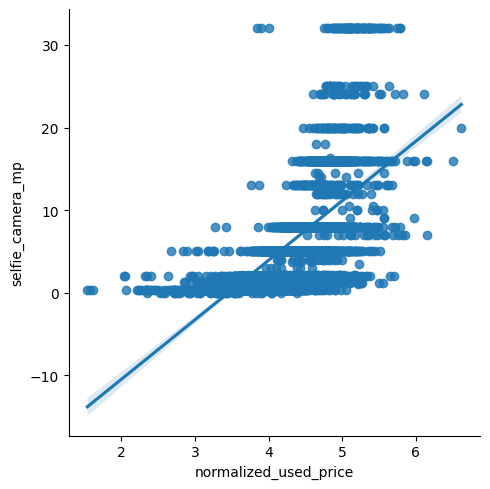

In [27]:
#normalized_used_price vs selfie_camera_mp
sns.lmplot(y='selfie_camera_mp',x='normalized_used_price',data=df);

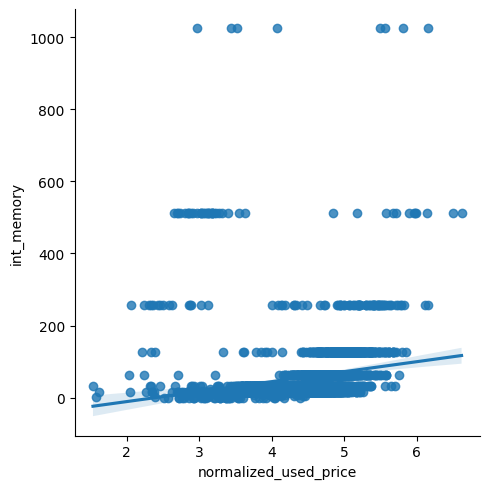

In [28]:
#normalized_used_price vs int_memory
sns.lmplot(y='int_memory',x='normalized_used_price',data=df);

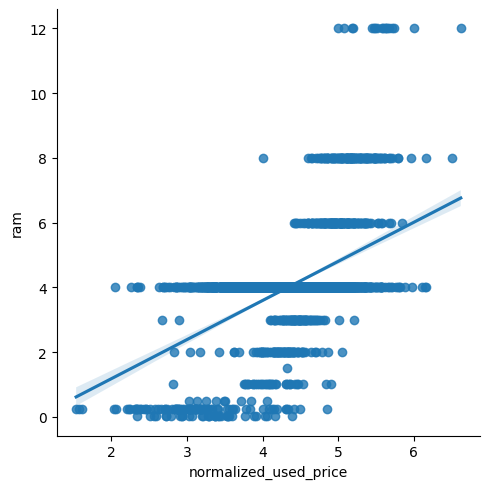

In [29]:
#normalized_used_price vs ram
sns.lmplot(y='ram',x='normalized_used_price',data=df);

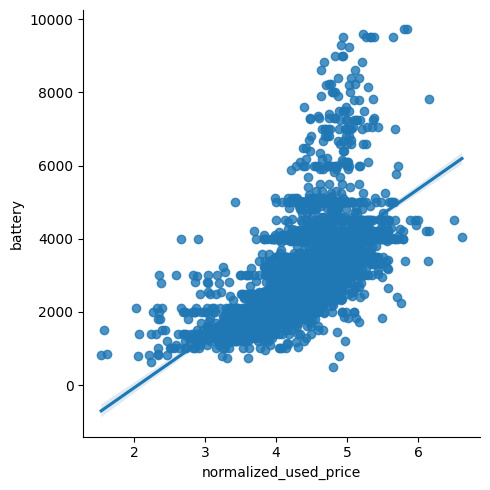

In [30]:
# normalized_used_price vs battery
sns.lmplot(y='battery',x='normalized_used_price',data=df);

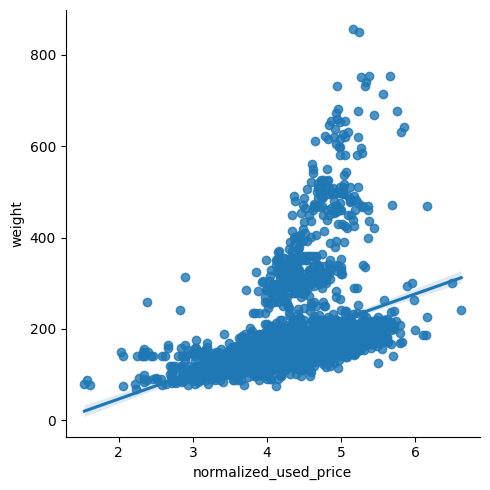

In [31]:
# normalized_used_price vs weight
sns.lmplot(y='weight',x='normalized_used_price',data=df);

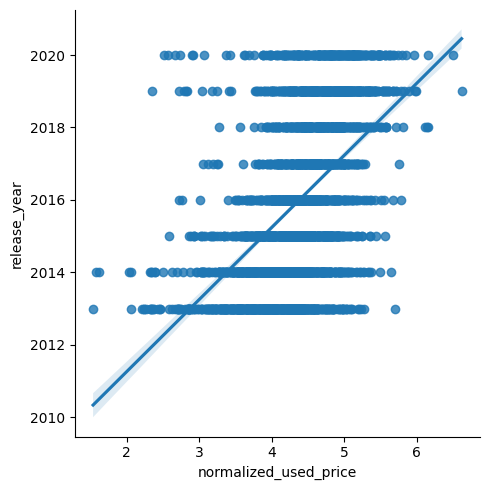

In [32]:
# normalized_used_price vs release_year
sns.lmplot(y='release_year',x='normalized_used_price',data=df);

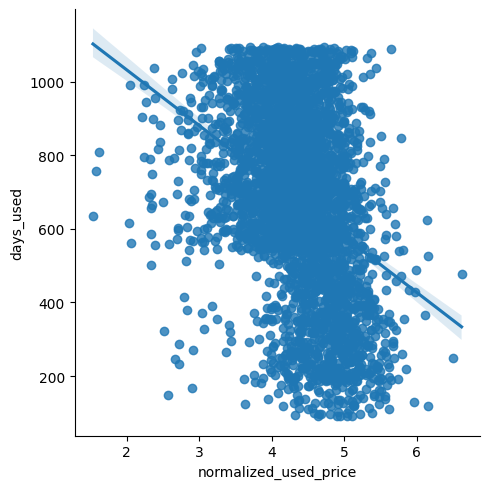

In [33]:
# normalized_used_price vs days_used
sns.lmplot(y='days_used',x='normalized_used_price',data=df);

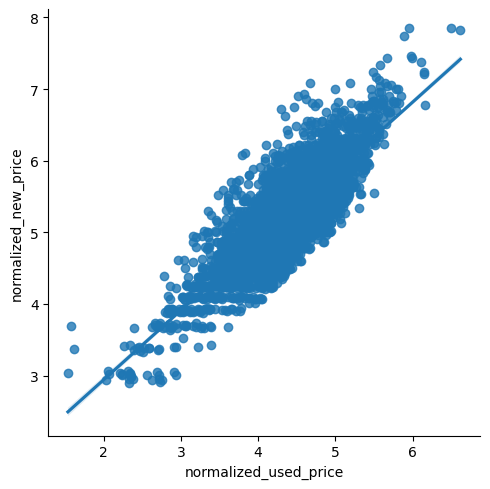

In [34]:
# normalized_used_price vs normalized_new_price
sns.lmplot(y='normalized_new_price',x='normalized_used_price',data=df);

**Data Observations:**

- Android devices has a lot of resale potential
- Many devices have 4g, Not many have 5g
- Average age of devices lie between 500 - 850 days
- normalized_used_price	is slightly left skewed
- High positive correlation between normalized_used_price	and normalized_new_price
- screensize,selfie_camera_mp, ram, battery, release_year	- All these fields have positive correlation with normalized_used_price. i.e., when these values increases, normalized_used_price increases
- days_used	have negative correlation with normalized_used_price. i.e., when this value increases, normalized_used_price deccreases
- main_camera_mp, int_memory, weight - All these fields have minimum  correlation with normalized_used_price.




**Questions:**

**What does the distribution of normalized used device prices look like?**
- normalized_used_price	is slightly left skewed






**Which attributes are highly correlated with the normalized price of a used device?**
- normalized_new_price is highly correlated with normalized_used_price
- battery, selfie_camera_mp, screen_size are correlated with normalized_used_price by 61%










**What percentage of the used device market is dominated by Android devices?**
- Used device market has 93% Android devices

In [35]:
#What percentage of the used device market is dominated by Android devices?
And_df = np.where(df['os']=='Android')
display(df.loc[And_df])

df.shape

# percentage of android devices = (3214/3454)*100

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


(3454, 15)

**The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?**

The top 3 brands with high Gb of Ram is,
Others        1896.50
Samsung       1432.00
Huawei        1168.50

In [36]:
#The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

df.groupby(['brand_name'])['ram'].sum()

brand_name
Acer           199.00
Alcatel        412.25
Apple          156.00
Asus           494.00
BlackBerry      84.25
Celkon          53.25
Coolpad         87.00
Gionee         220.25
Google          68.00
HTC            440.00
Honor          534.00
Huawei        1168.50
Infinix         26.00
Karbonn         97.25
LG             791.25
Lava           118.00
Lenovo         664.50
Meizu          276.00
Micromax       430.50
Microsoft       88.00
Motorola       418.00
Nokia          246.87
OnePlus        140.00
Oppo           640.00
Others        1896.50
Panasonic      188.00
Realme         172.00
Samsung       1432.00
Sony           350.00
Spice          112.50
Vivo           556.50
XOLO           196.00
Xiaomi         605.00
ZTE            563.25
Name: ram, dtype: float64

**A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?**

Phones with more battery energy capacity increases the weight of device, please refer the plot below.

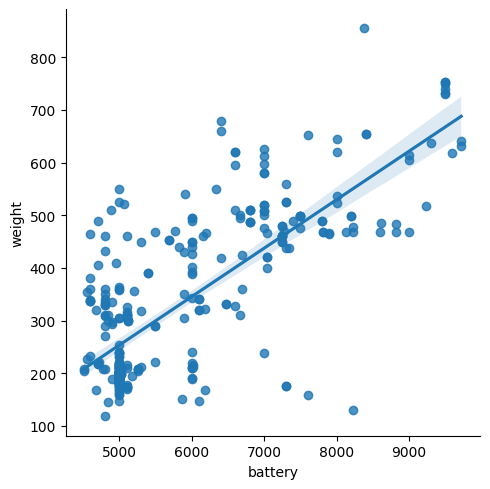

In [37]:
#A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

df2 = df[['battery','weight']]
df5 = df2.loc[df2['battery']>4500]
type(df5)

sns.lmplot(x='battery', y='weight', data=df5);

**Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?**

3362

In [38]:
#Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

# Binning of the data based on a condition
df.loc[df.screen_size <= 6, 'screen_size'] = 0
df.loc[df.screen_size > 6, 'screen_size'] = 1

# Grouping and couting
df.groupby('screen_size').count()

,brand_name,os,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
screen_size,,,,,,,,,,,,,,
0.0,92,92,92,92,92,92,89,89,90,92,92,92,92,92
1.0,3362,3362,3362,3362,3183,3360,3361,3361,3358,3355,3362,3362,3362,3362


**A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?**

Distribution plotted below.

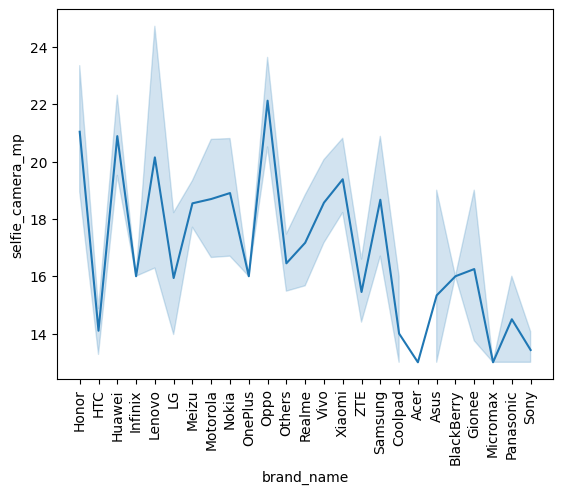

In [39]:
#A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

df3 = df.loc[df['selfie_camera_mp']>8]
sns.lineplot(x='brand_name',y='selfie_camera_mp',data=df3)
plt.xticks(rotation=90);


## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [40]:
#find missing value
df['brand_name'].isnull().value_counts()

False    3454
Name: brand_name, dtype: int64

In [41]:
df['os'].isnull().value_counts()

False    3454
Name: os, dtype: int64

In [42]:
df['screen_size'].isnull().value_counts()

False    3454
Name: screen_size, dtype: int64

In [43]:
df['4g'].isnull().value_counts()

False    3454
Name: 4g, dtype: int64

In [44]:
df['5g'].isnull().value_counts()

False    3454
Name: 5g, dtype: int64

In [45]:
df['main_camera_mp'].isnull().value_counts()

False    3275
True      179
Name: main_camera_mp, dtype: int64

In [46]:
df['selfie_camera_mp'].isnull().value_counts()

False    3452
True        2
Name: selfie_camera_mp, dtype: int64

In [47]:
df['int_memory'].isnull().value_counts()

False    3450
True        4
Name: int_memory, dtype: int64

In [48]:
df['ram'].isnull().value_counts()

False    3450
True        4
Name: ram, dtype: int64

In [49]:
df['battery'].isnull().value_counts()

False    3448
True        6
Name: battery, dtype: int64

In [50]:
df['weight'].isnull().value_counts()

False    3447
True        7
Name: weight, dtype: int64

In [51]:
df['release_year'].isnull().value_counts()

False    3454
Name: release_year, dtype: int64

In [52]:
df['days_used'].isnull().value_counts()

False    3454
Name: days_used, dtype: int64

In [53]:
df['normalized_used_price'].isnull().value_counts()

False    3454
Name: normalized_used_price, dtype: int64

In [54]:
df['normalized_new_price'].isnull().value_counts()

False    3454
Name: normalized_new_price, dtype: int64

In [55]:
#Create a copy of dataframe
df_copy = df.copy()
df_copy

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,1.0,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,1.0,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,1.0,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,1.0,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,1.0,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,1.0,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,1.0,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,1.0,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,1.0,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


In [56]:
# Replace null values by Median - Weight
wt_median = df_copy['weight'].median()
df_copy['weight'].fillna(wt_median,inplace=True)
df_copy['weight'].isnull().value_counts()

False    3454
Name: weight, dtype: int64

In [57]:
# Replace null values by Median - battery
bt_median = df_copy['battery'].median()
df_copy['battery'].fillna(bt_median,inplace=True)
df_copy['battery'].isnull().value_counts()

False    3454
Name: battery, dtype: int64

In [58]:
# Replace null values by Median - ram
ram_median = df_copy['ram'].median()
df_copy['ram'].fillna(ram_median,inplace=True)
df_copy['ram'].isnull().value_counts()

False    3454
Name: ram, dtype: int64

In [59]:
# Replace null values by Median - int_memory
mem_median = df_copy['int_memory'].median()
df_copy['int_memory'].fillna(mem_median,inplace=True)
df_copy['int_memory'].isnull().value_counts()

False    3454
Name: int_memory, dtype: int64

In [60]:
# Replace null values by Median - selfie_camera_mp
sel_median = df_copy['selfie_camera_mp'].median()
df_copy['selfie_camera_mp'].fillna(sel_median,inplace=True)
df_copy['selfie_camera_mp'].isnull().value_counts()

False    3454
Name: selfie_camera_mp, dtype: int64

In [61]:
# Replace null values by Median - main_camera_mp
main_median = df_copy['main_camera_mp'].median()
df_copy['main_camera_mp'].fillna(main_median,inplace=True)
df_copy['main_camera_mp'].isnull().value_counts()

False    3454
Name: main_camera_mp, dtype: int64

In [62]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [63]:
df_copy['weight'].unique()

array([146.  , 213.  , 480.  , 185.  , 176.  , 144.  , 164.  , 165.  ,
       150.  , 206.  , 171.5 , 172.  , 173.  , 453.6 , 170.  , 160.  ,
       180.  , 192.  , 182.  , 163.  , 310.  , 189.  , 450.  , 226.  ,
       460.  , 183.  , 178.  , 198.  , 196.  , 163.5 , 498.  , 340.  ,
       320.  , 171.  , 196.8 , 136.1 , 350.  , 209.  , 147.6 , 520.  ,
       580.  , 305.  , 236.  , 159.  , 655.  , 196.5 , 219.  , 127.  ,
       218.  , 148.  , 152.  , 186.  , 194.  , 175.  , 179.  , 140.45,
       199.  , 184.  , 166.  , 146.5 ,  89.  ,  85.  , 210.  , 203.  ,
       200.  ,  90.5 ,  91.3 , 220.  ,  88.2 ,  86.5 , 168.  , 181.  ,
       169.5 , 190.  , 215.  , 135.  , 191.  , 195.  , 313.  , 141.  ,
       206.5 , 153.  , 234.  , 204.1 , 181.5 , 190.2 , 197.  , 198.1 ,
       219.5 , 198.5 , 193.  , 186.7 , 191.5 , 190.5 , 218.5 , 217.3 ,
       217.  , 189.5 , 130.  , 145.  , 208.  , 205.  , 188.  , 241.  ,
       173.8 , 157.  , 154.  , 187.  , 467.  , 168.1 , 420.  , 256.  ,
      

In [64]:
df_copy.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<Axes: >

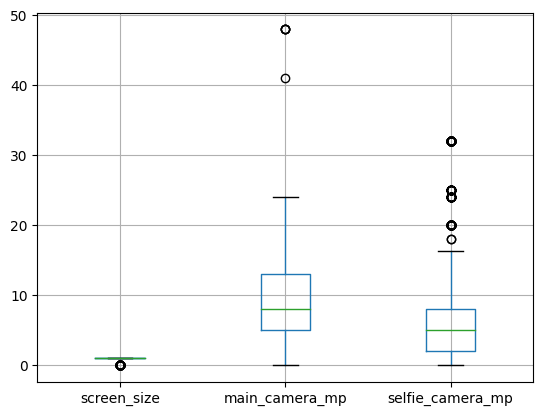

In [65]:
#Outliers

df_copy.boxplot(column = ['screen_size', 'main_camera_mp', 'selfie_camera_mp'])
# 'ram', 'battery', 'weight', 'release_year', 'days_used'])

<Axes: >

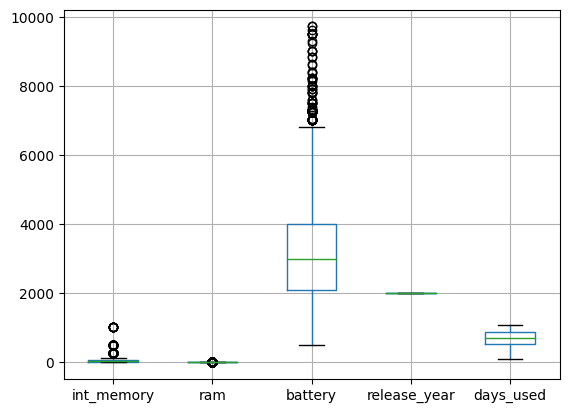

In [66]:
df_copy.boxplot(column = ['int_memory', 'ram', 'battery', 'release_year', 'days_used'])

In [67]:
df_copy

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,1.0,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,1.0,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,1.0,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,1.0,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,1.0,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,1.0,yes,no,8.0,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,1.0,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,1.0,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,1.0,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


In [68]:
#Create dummy variables - Prepare for modelling

df_withdummy = pd.get_dummies(df_copy, columns=['brand_name','4g','5g','os'], drop_first=True)
df_withdummy

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,4g_yes,5g_yes,os_Others,os_Windows,os_iOS
0,1.0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,...,0,0,0,0,0,1,0,0,0,0
1,1.0,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,...,0,0,0,0,0,1,1,0,0,0
2,1.0,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,...,0,0,0,0,0,1,1,0,0,0
3,1.0,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,...,0,0,0,0,0,1,1,0,0,0
4,1.0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,1.0,8.0,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,...,0,0,0,0,0,1,0,0,0,0
3450,1.0,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,...,0,0,0,0,0,1,0,0,0,0
3451,1.0,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,...,0,0,0,0,0,1,0,0,0,0
3452,1.0,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,...,0,0,0,0,0,1,0,0,0,0


## EDA

- It is a good idea to explore the data once again after manipulating it.

In [69]:
df_withdummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   screen_size            3454 non-null   float64
 1   main_camera_mp         3454 non-null   float64
 2   selfie_camera_mp       3454 non-null   float64
 3   int_memory             3454 non-null   float64
 4   ram                    3454 non-null   float64
 5   battery                3454 non-null   float64
 6   weight                 3454 non-null   float64
 7   release_year           3454 non-null   int64  
 8   days_used              3454 non-null   int64  
 9   normalized_used_price  3454 non-null   float64
 10  normalized_new_price   3454 non-null   float64
 11  brand_name_Alcatel     3454 non-null   uint8  
 12  brand_name_Apple       3454 non-null   uint8  
 13  brand_name_Asus        3454 non-null   uint8  
 14  brand_name_BlackBerry  3454 non-null   uint8  
 15  bran

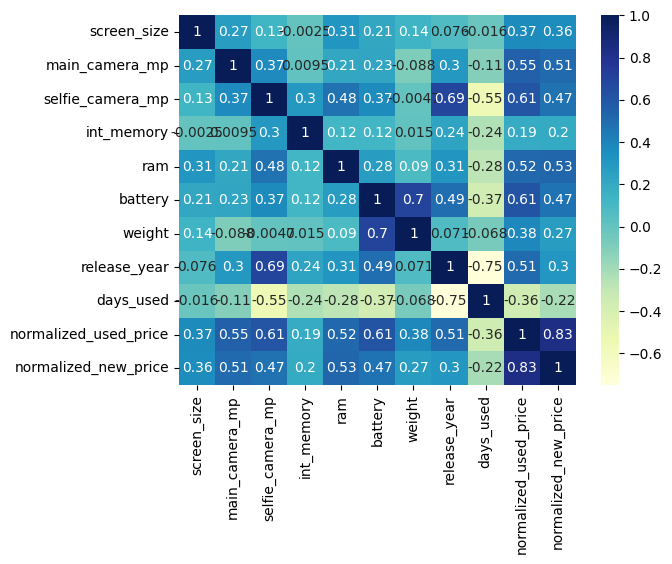

In [70]:
# plotting correlation heatmap
dataplot = sns.heatmap(df_copy.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

The correlation doesn't change a lot, so we are good with missing value treatment.

## Model Building - Linear Regression

In [71]:
# independent variables
X = df_withdummy.drop(["normalized_used_price"], axis=1)

# dependent variable
y = df_withdummy[["normalized_used_price"]]

In [72]:
# Add constant
X = sm.add_constant(X)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [74]:
df_withdummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   screen_size            3454 non-null   float64
 1   main_camera_mp         3454 non-null   float64
 2   selfie_camera_mp       3454 non-null   float64
 3   int_memory             3454 non-null   float64
 4   ram                    3454 non-null   float64
 5   battery                3454 non-null   float64
 6   weight                 3454 non-null   float64
 7   release_year           3454 non-null   int64  
 8   days_used              3454 non-null   int64  
 9   normalized_used_price  3454 non-null   float64
 10  normalized_new_price   3454 non-null   float64
 11  brand_name_Alcatel     3454 non-null   uint8  
 12  brand_name_Apple       3454 non-null   uint8  
 13  brand_name_Asus        3454 non-null   uint8  
 14  brand_name_BlackBerry  3454 non-null   uint8  
 15  bran

In [75]:
olsmod = sm.OLS(y_train,X_train)
olsres = olsmod.fit()

In [76]:
print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     263.0
Date:                   Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                           16:14:59   Log-Likelihood:                 102.09
No. Observations:                   2417   AIC:                            -106.2
Df Residuals:                       2368   BIC:                             177.5
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


Observations:
- Model is able to explain 84% of the variation (R-squared:                       0.842, Adj. R-squared:                  0.839)
- There are values greater than 0.05 in P-value
- Let's try to remove one by one

In [77]:
# independent variables
X = df_withdummy.drop(["normalized_used_price","int_memory" ], axis=1)

# dependent variable
y = df_withdummy[["normalized_used_price"]]

In [78]:
# Add constant
X = sm.add_constant(X)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [80]:
olsmod = sm.OLS(y_train,X_train)
olsres = olsmod.fit()

In [81]:
print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     268.6
Date:                   Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                           16:14:59   Log-Likelihood:                 101.40
No. Observations:                   2417   AIC:                            -106.8
Df Residuals:                       2369   BIC:                             171.1
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


Observation:
- After removing int_memory, the value of R-squared and Adj. R-squared are not changed.
-So, we are good with removal of 'int_memory'
-Let's try to remove next one

In [82]:
# independent variables
X = df_withdummy.drop(["normalized_used_price","int_memory","battery"], axis=1)

# dependent variable
y = df_withdummy[["normalized_used_price"]]

In [83]:
# Add constant
X = sm.add_constant(X)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [85]:
olsmod = sm.OLS(y_train,X_train)
olsres = olsmod.fit()

In [86]:
print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     274.5
Date:                   Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                           16:14:59   Log-Likelihood:                 101.30
No. Observations:                   2417   AIC:                            -108.6
Df Residuals:                       2370   BIC:                             163.5
Df Model:                             46                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


Observation:
- After removing 'battery', the value of R-squared and Adj. R-squared are not changed.
-So, we are good with removal of 'battery'
-Let's try to remove next one

In [87]:

# independent variables
X = df_withdummy.drop(["normalized_used_price","int_memory","battery","days_used"], axis=1)

# dependent variable
y = df_withdummy[["normalized_used_price"]]

In [88]:
# Add constant
X = sm.add_constant(X)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [90]:
olsmod = sm.OLS(y_train,X_train)
olsres = olsmod.fit()

In [91]:
print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     280.7
Date:                   Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                           16:14:59   Log-Likelihood:                 101.09
No. Observations:                   2417   AIC:                            -110.2
Df Residuals:                       2371   BIC:                             156.2
Df Model:                             45                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


Observation:
- After removing 'days_used', the value of R-squared and Adj. R-squared are not changed.
-So, we are good with removal of 'days_used'
-Let's try to remove next one

In [92]:
#Trying to remove all brands where p-value>0.05
# independent variables
X = df_withdummy.drop(["normalized_used_price","int_memory","battery","days_used","brand_name_Alcatel", "brand_name_Apple","brand_name_Asus","brand_name_BlackBerry","brand_name_Celkon","brand_name_Coolpad","brand_name_Gionee","brand_name_Google","brand_name_HTC","brand_name_Honor","brand_name_Huawei","brand_name_Infinix","brand_name_Karbonn","brand_name_LG","brand_name_Lava","brand_name_Lenovo","brand_name_Meizu","brand_name_Micromax","brand_name_Microsoft","brand_name_Motorola","brand_name_Nokia","brand_name_OnePlus","brand_name_Oppo","brand_name_Others","brand_name_Panasonic","brand_name_Realme","brand_name_Samsung","brand_name_Sony","brand_name_Spice","brand_name_Vivo","brand_name_XOLO","brand_name_Xiaomi","brand_name_ZTE"], axis=1)

# dependent variable
y = df_withdummy[["normalized_used_price"]]

In [93]:
# Add constant
X = sm.add_constant(X)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [95]:
olsmod = sm.OLS(y_train,X_train)
olsres = olsmod.fit()

In [96]:
print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1034.
Date:                   Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                           16:14:59   Log-Likelihood:                 69.154
No. Observations:                   2417   AIC:                            -112.3
Df Residuals:                       2404   BIC:                            -37.03
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

Observation:
- After removing 'brand_name_xx', the value of R-squared and Adj. R-squared have a minor change
-So, we are good with removal of 'brand_name_xx'
-Let's try to remove next one

In [97]:

# independent variables
X = df_withdummy.drop(["normalized_used_price","int_memory","battery","days_used","brand_name_Alcatel", "brand_name_Apple","brand_name_Asus","brand_name_BlackBerry","brand_name_Celkon","brand_name_Coolpad","brand_name_Gionee","brand_name_Google","brand_name_HTC","brand_name_Honor","brand_name_Huawei","brand_name_Infinix","brand_name_Karbonn","brand_name_LG","brand_name_Lava","brand_name_Lenovo","brand_name_Meizu","brand_name_Micromax","brand_name_Microsoft","brand_name_Motorola","brand_name_Nokia","brand_name_OnePlus","brand_name_Oppo","brand_name_Others","brand_name_Panasonic","brand_name_Realme","brand_name_Samsung","brand_name_Sony","brand_name_Spice","brand_name_Vivo","brand_name_XOLO","brand_name_Xiaomi","brand_name_ZTE","5g_yes"], axis=1)

# dependent variable
y = df_withdummy[["normalized_used_price"]]

In [98]:
# Add constant
X = sm.add_constant(X)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [100]:
olsmod = sm.OLS(y_train,X_train)
olsres = olsmod.fit()

In [101]:
print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1128.
Date:                   Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                           16:15:00   Log-Likelihood:                 68.980
No. Observations:                   2417   AIC:                            -114.0
Df Residuals:                       2405   BIC:                            -44.48
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

Observation:

-After removing '5g', the value of R-squared and Adj. R-squared are not changed.

-So, we are good with removal of '5g'

-Let's try to remove next one

In [102]:

# independent variables
X = df_withdummy.drop(["normalized_used_price","int_memory","battery","days_used","brand_name_Alcatel", "brand_name_Apple","brand_name_Asus","brand_name_BlackBerry","brand_name_Celkon","brand_name_Coolpad","brand_name_Gionee","brand_name_Google","brand_name_HTC","brand_name_Honor","brand_name_Huawei","brand_name_Infinix","brand_name_Karbonn","brand_name_LG","brand_name_Lava","brand_name_Lenovo","brand_name_Meizu","brand_name_Micromax","brand_name_Microsoft","brand_name_Motorola","brand_name_Nokia","brand_name_OnePlus","brand_name_Oppo","brand_name_Others","brand_name_Panasonic","brand_name_Realme","brand_name_Samsung","brand_name_Sony","brand_name_Spice","brand_name_Vivo","brand_name_XOLO","brand_name_Xiaomi","brand_name_ZTE","5g_yes","os_Windows"], axis=1)

# dependent variable
y = df_withdummy[["normalized_used_price"]]

In [103]:
# Add constant
X = sm.add_constant(X)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [105]:
olsmod = sm.OLS(y_train,X_train)
olsres = olsmod.fit()

In [106]:
print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1241.
Date:                   Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                           16:15:00   Log-Likelihood:                 68.780
No. Observations:                   2417   AIC:                            -115.6
Df Residuals:                       2406   BIC:                            -51.87
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co


Observation:

-After removing 'os_Windows', the value of R-squared and Adj. R-squared are not changed.

-So, we are good with removal of 'os_Windows'

-Let's try to remove next one

In [107]:
# independent variables
X = df_withdummy.drop(["normalized_used_price","int_memory","battery","days_used","brand_name_Alcatel", "brand_name_Apple","brand_name_Asus","brand_name_BlackBerry","brand_name_Celkon","brand_name_Coolpad","brand_name_Gionee","brand_name_Google","brand_name_HTC","brand_name_Honor","brand_name_Huawei","brand_name_Infinix","brand_name_Karbonn","brand_name_LG","brand_name_Lava","brand_name_Lenovo","brand_name_Meizu","brand_name_Micromax","brand_name_Microsoft","brand_name_Motorola","brand_name_Nokia","brand_name_OnePlus","brand_name_Oppo","brand_name_Others","brand_name_Panasonic","brand_name_Realme","brand_name_Samsung","brand_name_Sony","brand_name_Spice","brand_name_Vivo","brand_name_XOLO","brand_name_Xiaomi","brand_name_ZTE","5g_yes","os_Windows","os_iOS"], axis=1)

# dependent variable
y = df_withdummy[["normalized_used_price"]]

In [108]:
# Add constant
X = sm.add_constant(X)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [110]:
olsmod = sm.OLS(y_train,X_train)
olsres = olsmod.fit()

In [111]:
print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.837
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1378.
Date:                   Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                           16:15:00   Log-Likelihood:                 67.393
No. Observations:                   2417   AIC:                            -114.8
Df Residuals:                       2407   BIC:                            -56.88
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

Observation:

-After removing 'os_iOS', the value of R-squared has minor change and Adj. R-squared is not changed.

-So, we are good with removal of 'os_iOS'

-Let's try to remove next one

In [112]:
# independent variables
X = df_withdummy.drop(["normalized_used_price","int_memory","battery","days_used","brand_name_Alcatel", "brand_name_Apple","brand_name_Asus","brand_name_BlackBerry","brand_name_Celkon","brand_name_Coolpad","brand_name_Gionee","brand_name_Google","brand_name_HTC","brand_name_Honor","brand_name_Huawei","brand_name_Infinix","brand_name_Karbonn","brand_name_LG","brand_name_Lava","brand_name_Lenovo","brand_name_Meizu","brand_name_Micromax","brand_name_Microsoft","brand_name_Motorola","brand_name_Nokia","brand_name_OnePlus","brand_name_Oppo","brand_name_Others","brand_name_Panasonic","brand_name_Realme","brand_name_Samsung","brand_name_Sony","brand_name_Spice","brand_name_Vivo","brand_name_XOLO","brand_name_Xiaomi","brand_name_ZTE","5g_yes","os_Windows","os_iOS","os_Others"], axis=1)

# dependent variable
y = df_withdummy[["normalized_used_price"]]

In [113]:
# Add constant
X = sm.add_constant(X)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [115]:
olsmod = sm.OLS(y_train,X_train)
olsres = olsmod.fit()

In [116]:
print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.837
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1549.
Date:                   Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                           16:15:00   Log-Likelihood:                 65.942
No. Observations:                   2417   AIC:                            -113.9
Df Residuals:                       2408   BIC:                            -61.77
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

Observations:
- All the p-values are now less than 0.05
- R-squared and Adj. R-squared are not changed
- The model is able to explain the variance by 84%
- So, the model is good to go

## Model Performance Check

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.
- Assumpions to be verified:
  - Linearity
  - Independence
  - Normality
  - Homoscedasticity
  - Multicollinearity

In [117]:
# Test for Linearity and Independence

df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()
df_pred["Fitted Values"] = olsres.fittedvalues.values
df_pred["Residuals"] = olsres.resid.values

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,4.087488,3.867386,0.220102
1,4.448399,4.594575,-0.146175
2,4.315353,4.289080,0.026273
3,4.282068,4.244963,0.037105
4,4.456438,4.502863,-0.046425


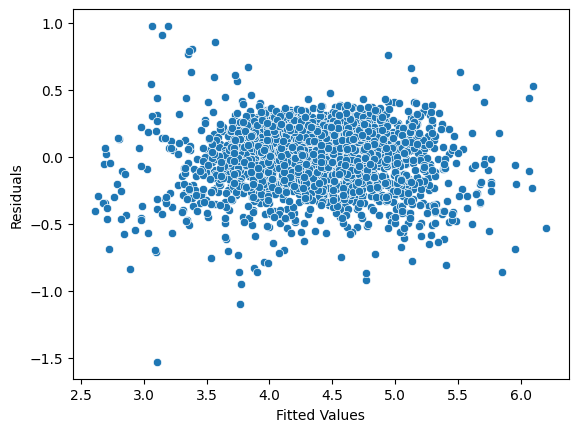

In [118]:
sns.scatterplot(x=df_pred["Fitted Values"], y=df_pred["Residuals"]);

**Observations:**
- There is NO pattern in the plot
- This satisfies Linearity and Independence

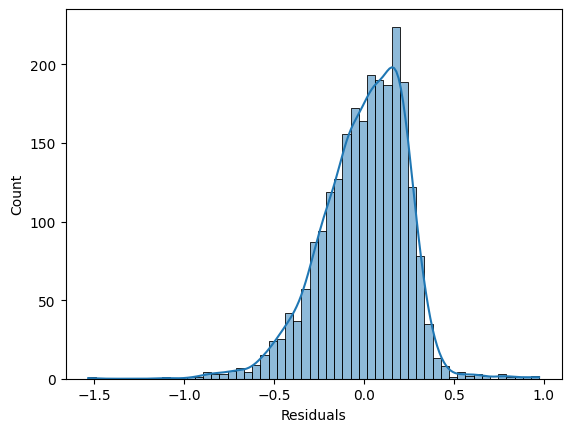

In [119]:
# Test for Normality
# Test 1 - plotting histogram

sns.histplot(x=df_pred["Residuals"], kde=True);

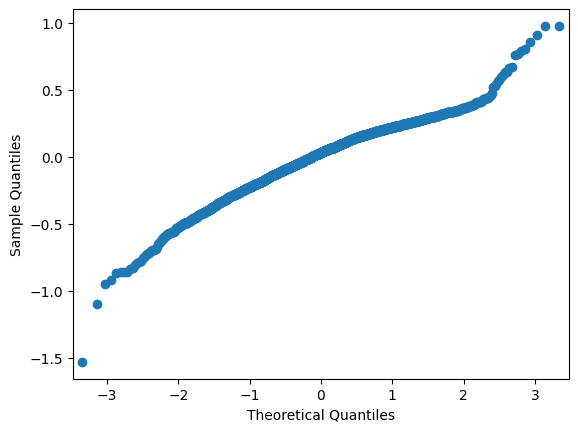

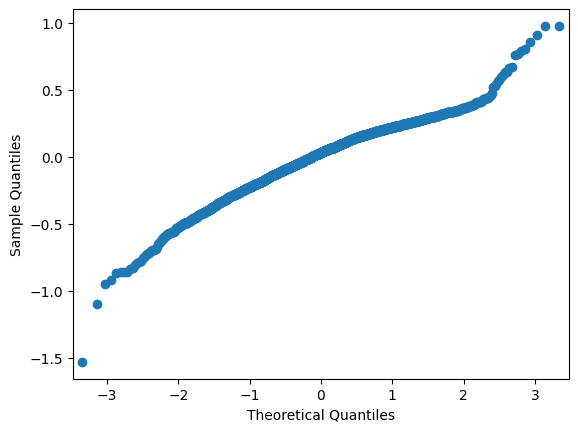

In [120]:
# Test for Normality
# Test 2 - Q-Q plot

sm.qqplot(df_pred["Residuals"])

In [121]:
# Test for Normality
# Test 3 - Shaipro wilk test

stats.shapiro((df_pred["Residuals"]))

ShapiroResult(statistic=0.9684293270111084, pvalue=1.2472866574711774e-22)

**Observations:**
- Test 1 - plotting histogram: Distribution looks almost normal
- Test 2 - Q-Q plot: The line deviates slightly
- Test 3 - Shaipro wilk test: p-value is less than 0.05, so the the distribution is not normal

In [122]:
#Test for Homoscedasticity

sm.stats.diagnostic.het_goldfeldquandt(y_train,X_train)

(1.034302544011507, 0.2796348644350821, 'increasing')

**Observations:**

Null hypothesis - Homoscedasticity is present
Alternate hypothesis - Homoscedasticity is not present

- Since p-value(0.2796348644350821) is greater than 0.05, we fail to reject null hypothesis
- Hence, Homoscedasticity is present

In [123]:
# Test for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df = pd.DataFrame()
vif_df["Columns"] = X_train.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_df

,Columns,VIF
0,const,1.979313e+06
1,screen_size,1.230317e+00
2,main_camera_mp,1.769368e+00
3,selfie_camera_mp,2.501323e+00
4,ram,1.650034e+00
5,weight,1.230975e+00
6,release_year,2.570623e+00
7,normalized_new_price,2.378535e+00
8,4g_yes,2.180250e+00


## Final Model

In [124]:
olsres.params

const                  -63.517348
screen_size              0.187077
main_camera_mp           0.021174
selfie_camera_mp         0.014676
ram                      0.020242
weight                   0.001648
release_year             0.032127
normalized_new_price     0.425760
4g_yes                   0.043204
dtype: float64

In [125]:
# Final equation - y=a+bx

#list1 = range(len(X_train.columns))

print("Used device price = ")
for i in range(0,len(X_train.columns)):
  if i == 0:
    print(olsres.params[0]," ","+"," ")
  elif i != len(X_train.columns) - 1:
    print(olsres.params[i]," ", "(", X_train.columns[i],")")

Used device price = 
-63.51734788338254   +  
0.1870772698241292   ( screen_size )
0.021174137417639897   ( main_camera_mp )
0.014675976352543944   ( selfie_camera_mp )
0.020241729189970376   ( ram )
0.0016484068844071682   ( weight )
0.03212663913223996   ( release_year )
0.4257603405933305   ( normalized_new_price )


## Actionable Insights and Recommendations

- Price of a used device is calculated using the above equation
- Model is predicting the price by 84%
- High positive correlation between normalized_used_price and normalized_new_price
-screensize,selfie_camera_mp, ram, battery, release_year - All these fields have positive correlation with normalized_used_price. i.e., when these values increases, normalized_used_price increases
-days_used have negative correlation with normalized_used_price. i.e., when this value increases, normalized_used_price decreases

Recommendations:
- Recell may concentrate on less used devices(days_used should be less) for more sales
- Recell can increase the latest models(release_year is recent) to increase the sales
- Increase in screen size, selfie camera resolution, memory and battery power are good selling points. So, need to re sell the devices based on these factors.
- This will increase the profit and stabilize Recell in used mobile market!



___